In [85]:
import numpy as np
import sklearn
from sklearn.datasets import load_sample_image
import tensorflow as tf
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

/Users/daniel/Workspace/Checkouts/sandbox/python/jupyter/calculus/calcenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/daniel/Workspace/Checkouts/sandbox/python/jupyter/calculus/calcenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/daniel/Workspace/Checkouts/sandbox/python/jupyter/calculus/calcenv/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/

In [86]:
china_partial = china[150:220, 130:250]
height, width, channels = china_partial.shape
image_grayscale = china_partial.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1

tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

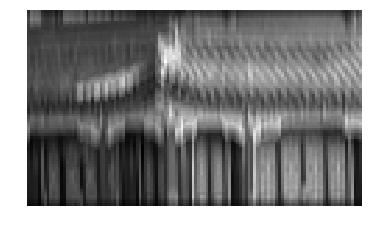

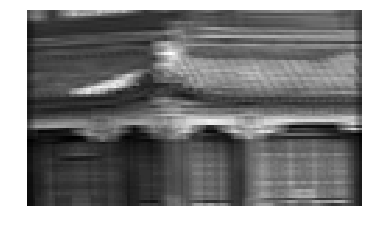

In [95]:
plt.imshow(output[0,:,:,0], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.show()
plt.imshow(output[0,:,:,1], cmap="gray", interpolation="nearest")
plt.axis("off")
plt.show()